In [32]:
src = '../data/reconstruction'
ply = '../data/reconstruction'

In [66]:
from Multiview_3D_Reconstruction import sfm

In [69]:
a = sfm.Sfm(src, ply)
a()

REPROJECTION ERROR:  0.030682442787510537


0it [00:00, ?it/s]

Printing to .ply file
(1, 3) (1, 3)
(1, 3) (1, 3)
c:\Users\nikit\Desktop\Учеба\ИТМО\ХАХАтон\notebooks\../data/reconstruction\result.ply
Completed Exiting ...
c:\Users\nikit\Desktop\Учеба\ИТМО\ХАХАтон\notebooks\../data/reconstruction\pose_array.csv


In [124]:
import numpy as np
import cv2 as cv
import glob
 
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 
images = glob.glob('../data/reconstruction/*.jpg')
 
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7, 6), None, flags=cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_NORMALIZE_IMAGE + cv.CALIB_CB_FAST_CHECK)
    print(ret)
 
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
 
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
 
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
 
cv.destroyAllWindows()

False
False
False


(49, 3)
['../data/calibration\\image.png', '../data/calibration\\Im_L_1.png']
False
False


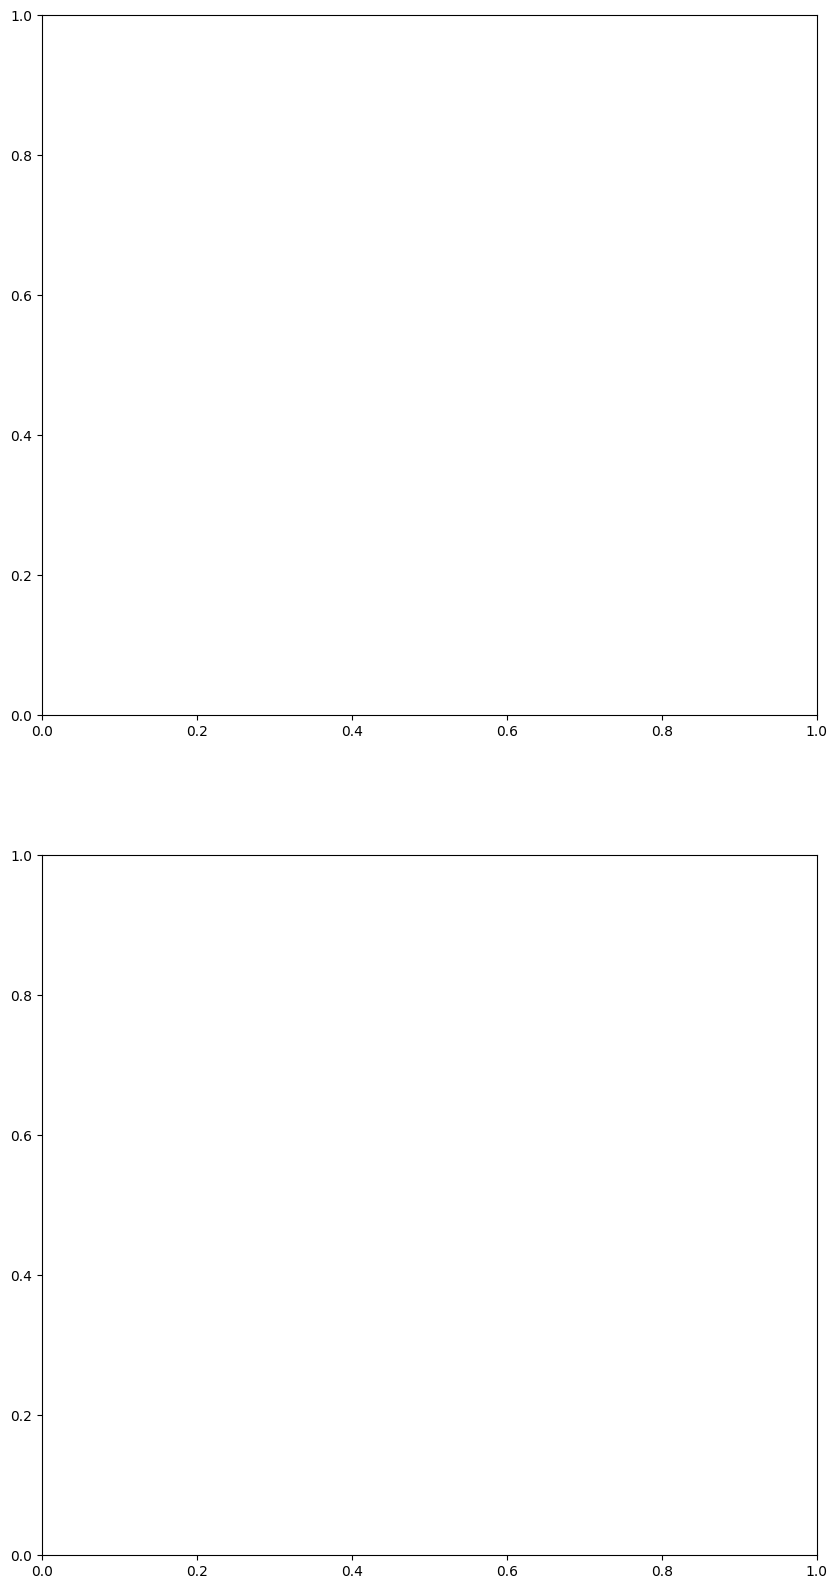

In [64]:
import numpy as np
import cv2 as cv
from cv2 import dnn_superres
import glob
import matplotlib.pyplot as plt
 
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
chessCorners = (7, 7)
 
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessCorners[0]*chessCorners[1],3), np.float32)
objp[:,:2] = np.mgrid[0:chessCorners[0],0:chessCorners[1]].T.reshape(-1,2)
print(objp.shape)
 
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
 
images = glob.glob('../data/calibration/*.png')
fig, axs = plt.subplots(len(images), 1, figsize=(10, 20))
print(images)

if len(images)==1:
    axs = [axs]

for fname, ax in zip(images, axs):
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #cv.imshow('img', img)
    #cv.waitKey(0)
 
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, chessCorners)
    print(ret)
 
    # If found, add object points, image points (after refining them)
    if ret == True:
        print(corners.shape)
        objpoints.append(objp)
 
        corners2 = cv.cornerSubPix(gray, corners, (15, 15), (-1,-1), criteria)
        imgpoints.append(corners2)
 
        # Draw and display the corners
        res = cv.drawChessboardCorners(img, chessCorners, corners2, ret)
        #res = res.reshape(res.shape[0]*2, res.shape[1]*2)
        #cv.imshow('img', img)
        #cv.waitKey(0)
        ax.imshow(res)
 
#cv.destroyAllWindows()
#plt.figure(figsize=(15, 7))
#plt.imshow(res)

In [53]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [54]:
mtx

array([[9.50118843e+03, 0.00000000e+00, 8.15149374e+02],
       [0.00000000e+00, 4.62554344e+03, 5.53608452e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [55]:
target = '../data/reconstruction/K.txt'

def write_K(mat):
    s = ""
    for i in mat:
        for j in i:
            s += str(j) + ' '
        s += '\n'
    s = s[:-1]
    with open(target, 'w') as f: 
        f.write(s)
    return s

print(write_K(mtx))

9501.188430521277 0.0 815.1493738228477 
0.0 4625.543439113668 553.6084517622132 
0.0 0.0 1.0 


In [56]:
objpoints[-1].shape
imgpoints[-1].shape

(48, 1, 2)

In [60]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv.imread(images[-1])
img = res
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

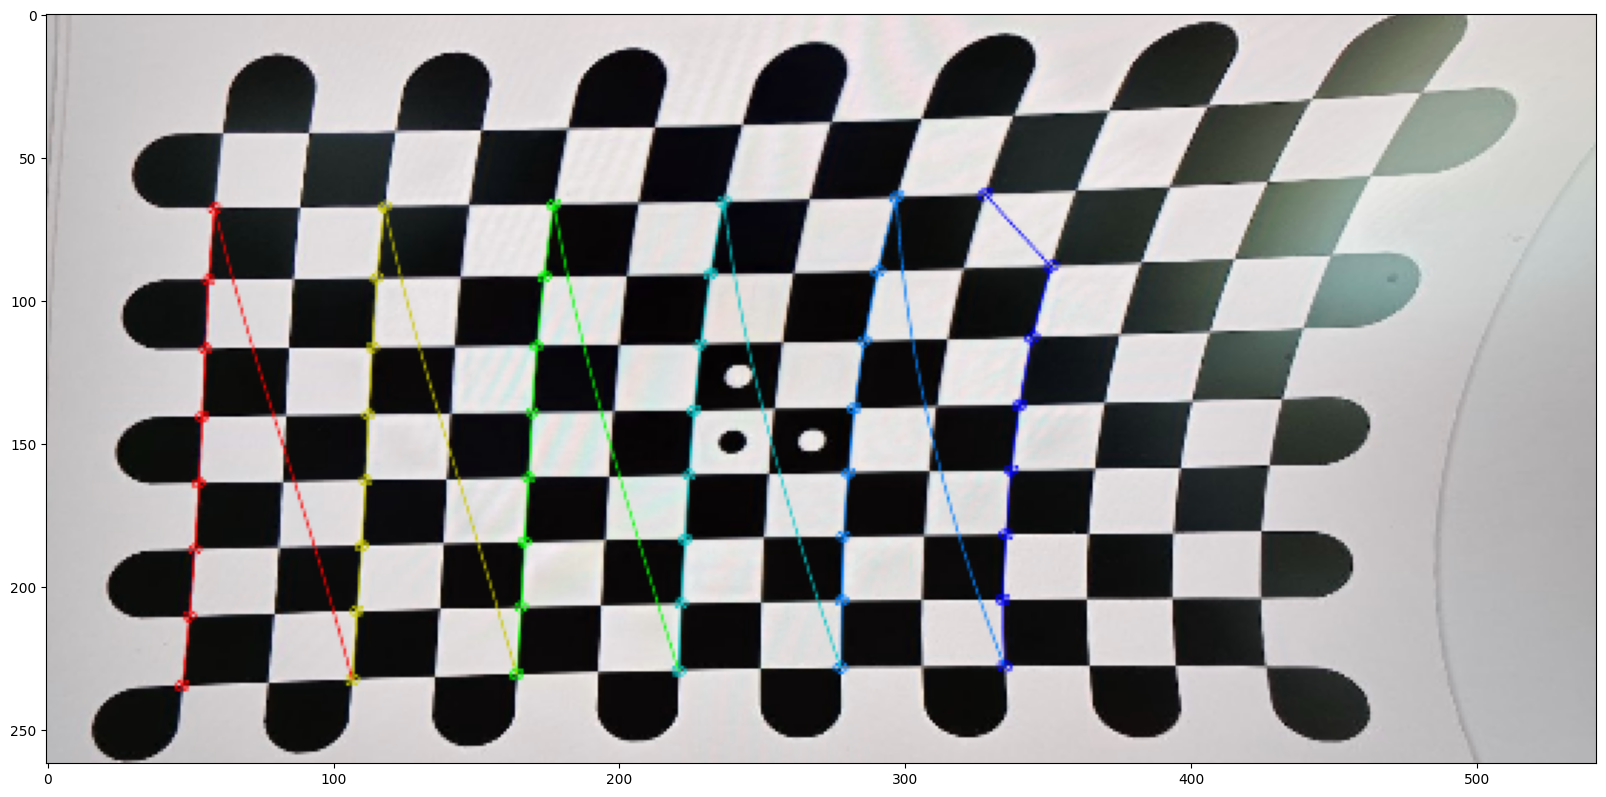

In [61]:
# undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)
 
plt.figure(figsize=(20, 10))

# crop the image
x, y, w, h = roi
plt.imshow(dst)
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)

#cv.imwrite('calibresult.png', dst)
